<a href="https://colab.research.google.com/github/nrm176/meti-bigdata-project-hannari-python/blob/master/meti_bigdata_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"
plotly.__version__

'4.4.1'

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font='IPAGothic')

In [ ]:
from datetime import datetime

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/METI/meti_pos_summary_data.csv', sep='\t', encoding='utf-16')

In [ ]:
df.shape

(329830, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329830 entries, 0 to 329829
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   期間_表示           329830 non-null  object 
 1   週次・月次(フィルタ用)    329830 non-null  object 
 2   地域名             329830 non-null  object 
 3   業態名             329830 non-null  object 
 4   大分類名            329830 non-null  object 
 5   中分類名            329830 non-null  object 
 6   Measure Names   329830 non-null  object 
 7   Measure Values  310869 non-null  float64
dtypes: float64(1), object(7)
memory usage: 20.1+ MB


In [ ]:
df

,期間_表示,週次・月次(フィルタ用),地域名,業態名,大分類名,中分類名,Measure Names,Measure Values
0,2012-10-07,週次,00_全国,05_家電大型専門店,00_大分類計,00_中分類計,前年比（％）,NaN
1,2012-10-14,週次,00_全国,05_家電大型専門店,00_大分類計,00_中分類計,前年比（％）,NaN
2,2012-10-21,週次,00_全国,05_家電大型専門店,00_大分類計,00_中分類計,前年比（％）,NaN
3,2012-10-28,週次,00_全国,05_家電大型専門店,00_大分類計,00_中分類計,前年比（％）,NaN
4,2012-11-04,週次,00_全国,05_家電大型専門店,00_大分類計,00_中分類計,前年比（％）,NaN
...,...,...,...,...,...,...,...,...
329825,2020-06-21,週次,15_中国・四国・九州・沖縄,05_家電大型専門店,70_家電,75_エアコン,販売金額指数,267.88
329826,2020-06-28,週次,15_中国・四国・九州・沖縄,05_家電大型専門店,70_家電,75_エアコン,販売金額指数,259.06
329827,2020-07-05,週次,15_中国・四国・九州・沖縄,05_家電大型専門店,70_家電,75_エアコン,販売金額指数,188.18
329828,2020-07-12,週次,15_中国・四国・九州・沖縄,05_家電大型専門店,70_家電,75_エアコン,販売金額指数,165.46


In [ ]:
df['Measure Names'].unique()

array(['前年比（％）', '販売金額指数'], dtype=object)

In [ ]:
df['地域名'].unique()

array(['00_全国', '01_北海道', '02_東北', '03_関東', '04_中部', '05_近畿', '06_中国',
       '07_四国', '08_九州', '09_沖縄', '11_北海道・東北', '12_関東・甲越', '13_東海・北陸',
       '14_近畿', '15_中国・四国・九州・沖縄'], dtype=object)

In [ ]:
columns = ['地域名', '業態名', '大分類名', '中分類名']
for column in columns:
  df[column] = df[column].apply(lambda x: x.split('_')[1])

In [ ]:
df.columns

Index(['期間_表示', '週次・月次(フィルタ用)', '地域名', '業態名', '大分類名', '中分類名', 'Measure Names',
       'Measure Values'],
      dtype='object')

In [ ]:
df = df.rename(columns={'期間_表示': 'ts', '週次・月次(フィルタ用)':'ts_pattern', '地域名':'region', '業態名':'industry', '大分類名':'category', 
                   '中分類名':'sub_category', 'Measure Names':'measure_pattern', 'Measure Values':'value'})

In [ ]:
df_yoy = df[df['measure_pattern'] == '販売金額指数']

In [ ]:
df_yoy['industry'].unique()

array(['家電大型専門店', 'スーパーマーケット', 'コンビニエンスストア', 'ホームセンター', 'ドラッグストア'],
      dtype=object)

In [ ]:
df_yoy.head()

,ts,ts_pattern,region,industry,category,sub_category,measure_pattern,value
407,2012-10-07,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,78.58
408,2012-10-14,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,84.55
409,2012-10-21,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,77.23
410,2012-10-28,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,83.79
411,2012-11-04,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,89.40


In [ ]:
 df_yoy[df_yoy.isna().any(axis=1)]

,ts,ts_pattern,region,industry,category,sub_category,measure_pattern,value
53424,2012-02-05,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53425,2012-02-12,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53426,2012-02-19,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53427,2012-02-26,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53428,2012-03-04,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
...,...,...,...,...,...,...,...,...
53855,2020-05-10,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53861,2020-06-21,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53862,2020-06-28,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN
53863,2020-07-05,週次,全国,コンビニエンスストア,ヘルスケア,ベビー,販売金額指数,NaN


In [ ]:
df_yoy = df_yoy.dropna()

In [ ]:
df_yoy

,ts,ts_pattern,region,industry,category,sub_category,measure_pattern,value
407,2012-10-07,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,78.58
408,2012-10-14,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,84.55
409,2012-10-21,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,77.23
410,2012-10-28,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,83.79
411,2012-11-04,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,89.40
...,...,...,...,...,...,...,...,...
329825,2020-06-21,週次,中国・四国・九州・沖縄,家電大型専門店,家電,エアコン,販売金額指数,267.88
329826,2020-06-28,週次,中国・四国・九州・沖縄,家電大型専門店,家電,エアコン,販売金額指数,259.06
329827,2020-07-05,週次,中国・四国・九州・沖縄,家電大型専門店,家電,エアコン,販売金額指数,188.18
329828,2020-07-12,週次,中国・四国・九州・沖縄,家電大型専門店,家電,エアコン,販売金額指数,165.46


In [ ]:
df_yoy['industry'].unique()

array(['家電大型専門店', 'スーパーマーケット', 'コンビニエンスストア', 'ホームセンター', 'ドラッグストア'],
      dtype=object)

In [ ]:
df_yoy['category'].unique()

array(['大分類計', '家電', '食品', '飲料', '雑貨', '化粧品', 'ヘルスケア', 'その他'],
      dtype=object)

In [ ]:
df_yoy['sub_category'].unique()

array(['中分類計', 'カラーテレビ', 'パソコン', '冷蔵庫', '洗濯機', 'エアコン', '主食', '調味料',
       '加工食品', '菓子', '嗜好品', '嗜好飲料', '清涼飲料', 'アルコール飲料', 'オーラルケア',
       'パーソナルケア', 'ハウスホールド', '紙製品', 'その他雑貨', 'ペット', '基礎化粧品', 'メイクアップ化粧品',
       'その他化粧品', '医薬品', '健康関連品', 'ベビー', 'たばこ'], dtype=object)

### 基礎化粧品はコロナ期間中売れた？

In [ ]:
df_skin_care = df_yoy[ df_yoy['sub_category'] == '基礎化粧品' ]

In [ ]:
df_skin_care.head()

,ts,ts_pattern,region,industry,category,sub_category,measure_pattern,value
23092,2012-01-08,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,90.74
23093,2012-01-15,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,75.97
23094,2012-01-22,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,91.41
23095,2012-01-29,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,82.30
23096,2012-02-05,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,91.84


In [ ]:
d = {}
for record in df_skin_care[['industry', 'value']].to_dict('records'):
  if d.get(record['industry']):
    arr = d.get(record['industry'])
    arr.append(record['value'])
    d[record['industry']]=arr
  else:
    d[record['industry']]=[record['value']]

In [ ]:
d.keys()

dict_keys(['スーパーマーケット', 'コンビニエンスストア', 'ホームセンター', 'ドラッグストア'])

In [ ]:
trace_super_market = go.Scatter(
    x = list(df_skin_care['ts']),
    y = d['スーパーマーケット'],
    mode = 'lines',
    name = 'スーパーマーケット'
)

trace_convinience_store = go.Scatter(
    x = list(df_skin_care['ts']),
    y = d['コンビニエンスストア'],
    mode = 'lines',
    name = 'コンビニエンスストア'
)

trace_home_center = go.Scatter(
    x = list(df_skin_care['ts']),
    y = d['ホームセンター'],
    mode = 'lines',
    name = 'ホームセンター'
)

trace_drug_store = go.Scatter(
    x = list(df_skin_care['ts']),
    y = d['ドラッグストア'],
    mode = 'lines',
    name = 'ドラッグストア'
)


In [ ]:
data = [trace_super_market, trace_convinience_store, trace_home_center, trace_drug_store]

layout = go.Layout(
    title  ="基礎化粧品",
)

fig = go.Figure(data, layout)
#plotly.offline.iplot(fig)
fig.show()

In [ ]:
df_skin_care

,ts,ts_pattern,region,industry,category,sub_category,measure_pattern,value
23092,2012-01-08,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,90.74
23093,2012-01-15,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,75.97
23094,2012-01-22,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,91.41
23095,2012-01-29,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,82.30
23096,2012-02-05,週次,全国,スーパーマーケット,化粧品,基礎化粧品,販売金額指数,91.84
...,...,...,...,...,...,...,...,...
96677,2020-06-21,週次,全国,ドラッグストア,化粧品,基礎化粧品,販売金額指数,107.45
96678,2020-06-28,週次,全国,ドラッグストア,化粧品,基礎化粧品,販売金額指数,112.38
96679,2020-07-05,週次,全国,ドラッグストア,化粧品,基礎化粧品,販売金額指数,102.88
96680,2020-07-12,週次,全国,ドラッグストア,化粧品,基礎化粧品,販売金額指数,90.61


In [ ]:
skin_care_table = pd.DataFrame(d)

In [ ]:
skin_care_table['ts']=list(df_skin_care['ts'].unique())

In [ ]:
skin_care_table

,スーパーマーケット,コンビニエンスストア,ホームセンター,ドラッグストア,ts
0,90.74,123.38,93.86,77.19,2012-01-08
1,75.97,107.92,108.69,87.02,2012-01-15
2,91.41,101.65,93.62,84.01,2012-01-22
3,82.30,102.55,120.88,104.45,2012-01-29
4,91.84,112.51,100.43,96.33,2012-02-05
...,...,...,...,...,...
441,101.04,102.84,80.10,107.45,2020-06-21
442,91.85,99.53,73.69,112.38,2020-06-28
443,84.63,83.76,69.34,102.88,2020-07-05
444,78.60,92.06,67.03,90.61,2020-07-12


In [ ]:
df_yoy[ (df_yoy['industry'] == '家電大型専門店') & (df_yoy['region'] == '全国') & (df_yoy['category'] == '大分類計')  ]

,ts,ts_pattern,region,industry,category,sub_category,measure_pattern,value
407,2012-10-07,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,78.58
408,2012-10-14,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,84.55
409,2012-10-21,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,77.23
410,2012-10-28,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,83.79
411,2012-11-04,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,89.40
...,...,...,...,...,...,...,...,...
809,2020-06-21,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,179.44
810,2020-06-28,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,183.98
811,2020-07-05,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,167.59
812,2020-07-12,週次,全国,家電大型専門店,大分類計,中分類計,販売金額指数,159.31


In [ ]:
x = df_yoy[ (df_yoy['industry'] == '家電大型専門店') & (df_yoy['region'] == '全国') & (df_yoy['category'] == '大分類計')  ][['ts','value']]

In [ ]:
x['ts']=pd.to_datetime(x['ts'])

findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


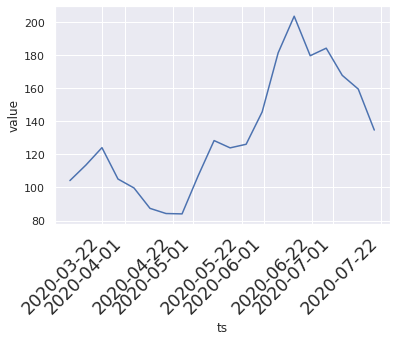

In [ ]:
sns.lineplot(x='ts', y='value', data=x[ x['ts'] >  datetime.strptime('2020-03-01', '%Y-%m-%d') ])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()